Změny oproti minulé verzi:
- 
    - základní data ve struktuře seznamu s vnořenými slovníky a vnořenými seznamy
    - funkce 

In [160]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import eurostat

In [161]:
# celá struktura pro Slovensko (mínus ty elektrárny)
definition = [
    {'code':'CRF2', # vnitřní graf, políčko 1                 PRŮMYSLOVÉ PROCESY
     'label':'Průmyslové procesy (výroba cementu, oceli...)',
     'sum':['CRF2'],                                     
     'color': '#ddddd',
     'breakdown': [
         {'code':'CRF2C', # vnější graf políčko 1.1
          'label':'Zpracování oceli a kovů',
          'sum':['CRF2C']}, 
         {'code':'CRF2A', # vnější graf políčko 1.2
          'label':'Minerální produkce (cement, vápno...)',
          'sum':['CRF2A']},
         {'code':'CRF2B', # vnější graf políčko 1.3
          'label':'Chemický průmysl',
          'sum':['CRF2B']}, 
         {'code':'CRF2_dif', # vnější graf políčko 1.3 - rozdíl
          'label':'Další průmyslové procesy',
          'reminder':True}]},
    {'code':'CRF1A3_CRF1D1A', # vnitřní graf, políčko 2         DOPRAVA
     'label':'Doprava (včetně letecké)',                     
     'sum':['CRF1A3', 'CRF1D1A'],
     'color': '#ddddd',
     'breakdown': [
        {'code':'CRF1A3B1', # vnější graf políčko 2.1
         'label':'Osobní automobilová doprava',
         'sum':['CRF1A3B1']},
         {'code':'CRF1A3B2_CRF1A3B3', # vnější graf políčko 2.2
          'label':'Nákladní a autobusová doprava',
          'sum':['CRF1A3B2', 'CRF1A3B3']},
         {'code':'CRF1D1A_CRF1A3A', # vnější graf políčko 2.3
          'label':'Letecká doprava',
          'sum':['CRF1D1A','CRF1A3A']},
         {'code':'CRF1A3_dif', # vnější graf políčko 2.4 - rozdíl
          'label':'Jiná doprava',
          'reminder':True}]},
    {'code':'CRF1A2', # vnitřní graf, políčko 3                 SPALOVÁNÍ V PRŮMYSLU
     'label':'Spalování v průmyslu',                     
     'sum':['CRF1A2'],
     'color': '#ddddd',
     'breakdown': [  
        {'code':'CRF1A2A_CRF1A2B', # vnější graf políčko 3.1
         'label':'Spalování při zpracování oceli a kovů',
         'sum':['CRF1A2A','CRF1A2B']},   
        {'code':'CRF1A2_dil', # vnější graf políčko 3.2 - rozdíl
         'label':'Další spalování v průmyslu',
         'reminder':True}]},       
    {'code':'CRF1A1', # vnitřní graf, políčko 4                 ENERGETIKA
     'label':'Energetika',                     
     'sum':['CRF1A1'],
     'color': '#ddddd',
     'breakdown': [
        {'code':'CRF1A1C_CRF1A1B', # vnější graf políčko 4.1
         'label':'Rafinace, výroba a úprava paliv',
         'sum':['CRF1A1C','CRF1A1B']},   
        {'code':'CRF1A2_dif_X', # vnější graf políčko 4.2 - rozdíl
         'label':'Teplárny a elektrárny',
         'reminder':True}]},
    {'code':'CRF1A4', # vnitřní graf, políčko 5                 SPALOVÁNÍ V DOM, INST A ZEMĚĎ
     'label':'Spalování v domácnostech, institucích a zemědělství',
     'sum':['CRF1A4'],                                     
     'color': '#ddddd'}, 
    {'code':'CRF3', # vnitřní graf, políčko 6                   ZEMĚDĚLSTVÍ
     'label':'Zemědělství',
     'sum':['CRF3'],                                     
     'color': '#ddddd'}, 
    {'code':'CRF5', # vnitřní graf, políčko 7                   ODPADOVÉ HOSPODÁŘSTVÍ
     'label':'Odpadové hospodářství',
     'sum':['CRF5'],                                     
     'color': '#ddddd'}, 
   {'code':'TOTAL_DIF', # vnitřní graf, políčko 8                   JINÉ   
    'label':'Jiné',                                    
    'color': '#ddddd', 
    'reminder':True}
]
                

Zadej stát a rok

In [162]:
YEAR = 2018 
STATE = 'SK'  

Dataframe z eurostatu

In [163]:
df = eurostat.get_data_df('env_air_gge')

In [164]:
# Pandas query() does not allow backslash in column names so "rename column" is needed. 
df = df.rename(columns={'geo\\time': 'geo'}) 

In [165]:
df2 = df.query("airpol == 'GHG' and geo == @STATE and unit == 'MIO_T'") 

In [166]:
df2 = df2[["src_crf", YEAR]] # jen kod odvětví a rok
df2 = df2.set_index('src_crf') # src_crf jako index

Funkce

In [167]:
def get_value(key,df): # získej hodnotu. Zadej klíč a df
    return df.loc[key,YEAR]

def get_sum(keys,df):
    sum = 0
    for key in keys:
        sum+= get_value(key,df)
    return sum

In [168]:
def add_sum(sub_definition,df):
    code = sub_definition['code']
    sum = get_sum(sub_definition['sum'],df)
    df.loc[code, YEAR] = sum

In [169]:
def count_sum(definition,df): 
    for wedge_def in definition:
        if 'sum' in wedge_def:
            add_sum(wedge_def,df)       
        if 'breakdown' not in wedge_def:
            continue
        breakdown_def = wedge_def['breakdown']
        for outer_wedge_def in breakdown_def:
            if 'sum'in outer_wedge_def:
                add_sum(outer_wedge_def,df)
    return df
count_sum(definition,df2)

,2018
src_crf,
CRF1,28.29565
CRF1A,27.83462
CRF1A1,7.43052
CRF1A1A,4.76011
CRF1A1B,1.48830
...,...
CRF1A3_CRF1D1A,8.00405
CRF1A3B2_CRF1A3B3,3.00624
CRF1D1A_CRF1A3A,0.18891


In [170]:
# přidej hodnotu pro poslední políčko vnitřního grafu: poslední rozdíl oproti celku
def add_final_reminder (definition,df): 
    codes = [inner_wedge_def['code'] for inner_wedge_def in definition[:-1]] # [:-1] říká "hodnotu na posledním indexu vynechej"
    parcial_total = get_sum(codes, df2)
    total = df.loc['TOTX4_MEMONIA',YEAR] # napevno 'TOTX4_MEMONIA'
    reminder = total - parcial_total
    code = definition[-1]['code']
    df.loc[code,YEAR] = reminder

In [171]:
add_final_reminder(definition,df2)

In [172]:
def count_diff(definition,df): 
    for wedge_def in definition:
        if 'breakdown' not in wedge_def:
            continue
        breakdown_def = wedge_def['breakdown']
        outer_wedges_codes = []
        for outer_wedge_def in breakdown_def:
            if 'sum'in outer_wedge_def:
                code =  outer_wedge_def['code'] 
                outer_wedges_codes.append(code)
            elif 'reminder' in outer_wedge_def:
                sum = get_sum(outer_wedges_codes,df)
                code = wedge_def['code']
                dif = get_value(code,df) - sum
                df.loc[outer_wedge_def['code'], YEAR] = dif # přidá nový řádek ke stávajímu df
    return df

In [173]:
count_diff(definition,df2)

,2018
src_crf,
CRF1,28.29565
CRF1A,27.83462
CRF1A1,7.43052
CRF1A1A,4.76011
CRF1A1B,1.48830
...,...
TOTAL_DIF,0.60324
CRF2_dif,0.82198
CRF1A3_dif,0.41038


Popisky pro vnější a vnitřní graf

In [174]:
inner_labels = []
outer_labels = []

for area in definition:
    inner_labels.append(area['code']) 
    if 'breakdown' not in area:
        continue
    for subarea in area['breakdown']:
        outer_labels.append(subarea['code'])

Relativní dataframe pro vnější graf

In [175]:
total = get_sum(inner_labels, df2)
df_rel = df2.loc[outer_labels]/total # relativní dataframe vnějšího grafu se součtem pod 1. Abych dostal necelý vnější koláč

Graf

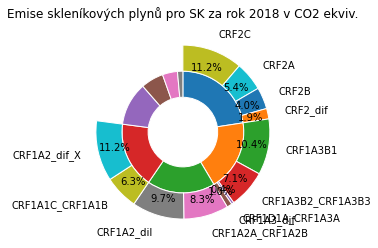

In [176]:
fig, ax = plt.subplots()
size = 0.3

# vnitřní
ax.pie(df2.loc[inner_labels][YEAR], radius=1-size, counterclock=False, startangle=90, 
       wedgeprops=dict(width=size, edgecolor='w'))

# vnější
ax.pie(df_rel[YEAR], # tohle mi to řadí a 'YEAR' bere hodnoty ze sloupce YEAR
       radius=1, labels = outer_labels, counterclock=False, startangle=90, normalize = False,
       autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.2, wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title = f'Emise skleníkových plynů pro {STATE} za rok {YEAR} v CO2 ekviv.')

plt.show()